## Gig Economy Project

By: Janet Taylor & Evan Kessler

Workers in the gig economy (i.e., Uber, GrubHub, TaskRabbit, etc.) depend on the reviews they get to continue working on the platform. Workers on those platforms are often affected by receiving negative reviews that describe elements that were not under their control. The project explores how the analysis of online reviews can detect when unfair reviews are left to workers and identify the type of unfair review that was left.

In [11]:
import pandas as pd

In [12]:
uber = pd.read_csv("uber_cleaned.csv")
lyft = pd.read_csv("lyft_cleaned.csv")
uber['Rating_Scaled'] = (uber['Rating'] - 3) / 2
lyft['Rating_Scaled'] = (uber['Rating'] - 3) / 2
pd.options.display.max_colwidth = 500
uber["Review Body"].head()

0    all your driver's we very good, knowledgeable and friendly. however, ellie was exceptional. she established a rapport with my daughter and i in the very short time we were in the car with her. she was helpful, answered our questions about the island and even gave us a few suggestions on places she enjoyed eating. which in fact we did try freda's and it was good. thank you, ellie, for your service, customer service and helpfulness!
1                                                                                                                                                                driver canceled the ride because he couldn’t find us and we were charged $5.  we were waiting for him but he didn’t show up.  when i tried contacting him, i went directly into voicemail but couldn’t leave a message.  had to order another ride and the second driver picked us up.
2                                                                                                                       

In [13]:
uber.columns

uber['Review Body']

0                                                                        all your driver's we very good, knowledgeable and friendly. however, ellie was exceptional. she established a rapport with my daughter and i in the very short time we were in the car with her. she was helpful, answered our questions about the island and even gave us a few suggestions on places she enjoyed eating. which in fact we did try freda's and it was good. thank you, ellie, for your service, customer service and helpfulness!
1                                                                                                                                                                                                                                    driver canceled the ride because he couldn’t find us and we were charged $5.  we were waiting for him but he didn’t show up.  when i tried contacting him, i went directly into voicemail but couldn’t leave a message.  had to order another ride and the second drive

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evkes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'driver': 2928, 'uber': 2917, 'drivers': 1482, 'time': 879, 'get': 814, 'ride': 776, 'service': 619, 'app': 554, 'use': 540, 'car': 515, 'never': 499, 'trip': 459, 'would': 452, 'got': 440, 'minutes': 437, 'charged': 427, 'even': 426, 'customer': 418, 'one': 404, 'good': 374, 'cancel': 371, 'said': 361, 'great': 361, 'take': 349, 'pick': 345, 'friendly': 305, 'company': 298, 'cancelled': 291, 'way': 289, 'money': 288, 'experience': 285, 'driver.': 285, 'using': 278, 'taxi': 276, 'back': 275, 'like': 273, 'uber.': 271, 'another': 264, 'took': 257, 'waiting': 256, 'clean': 246, 'could': 243, 'arrived': 242, 'wait': 240, 'booked': 240, 'first': 236, 'used': 235, 'pay': 235, 'last': 230, 'know': 229, 'nice': 224, 'give': 217, 'bad': 214, 'told': 214, 'charge': 212, 'times': 210, 'still': 208, 'going': 206, 'call': 203, 'find': 202, 'time.': 202, 'service.': 202, 'don’t': 200, 'always': 198, 'want': 196, 'airport': 186, 'make': 186, 'made': 180, 'tried': 179, 'also': 179, 'phone': 178, 'dr

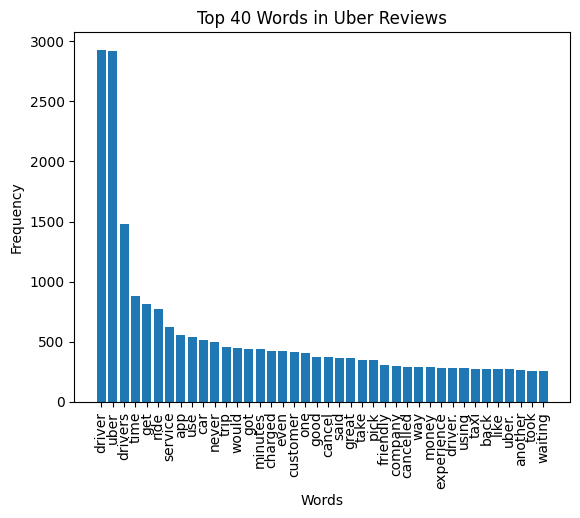

Top 20 words with highest weighted averages:
awesome: 0.62
excellent: 0.58
great!: 0.56
wonderful: 0.56
conversation.: 0.55
enjoyed: 0.50
pleasant: 0.49
excellent.: 0.48
perfect.: 0.47
courteous,: 0.47
great.: 0.46
enjoyable: 0.46
great: 0.46
kind,: 0.46
courteous: 0.46
conversation: 0.46
nice: 0.45
perfect: 0.45
pleasant.: 0.45
courteous.: 0.45

Bottom 20 words with lowest weighted averages:
dangerous: -0.19
stupid: -0.20
bad: -0.20
cold: -0.20
refunds: -0.21
impossible: -0.23
rude.: -0.24
disgusting: -0.25
cold.: -0.27
terrible: -0.27
ignored: -0.28
horrible: -0.28
worst: -0.29
disgusted: -0.29
pathetic: -0.29
awful: -0.30
terrible.: -0.32
shocking: -0.33
nasty: -0.37
awful.: -0.41


In [14]:
from collections import Counter
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Load the stop words
stop_words = set(stopwords.words('english'))

# Compute the sentiment polarity score for each review
sentiment_scores = []
for review in uber['Review Body']:
    blob = TextBlob(review)
    sentiment_scores.append(blob.sentiment.polarity)

# Add the sentiment polarity scores as a new column in the dataframe
uber['Sentiment_Polarity'] = sentiment_scores

# Create a list of all words in the reviews
words = [word.lower() for review in uber['Review Body'] for word in review.split() if word.lower() not in stop_words and len(word) > 2]

# Use Counter to count the occurrence of each word
word_count = Counter(words)

word_freq_dict = {}

for word, freq in sorted(word_count.items(), key=lambda item: item[1], reverse=True):
    if freq >= 10:
        word_freq_dict[word] = freq

print(word_freq_dict)

top_words = list(word_freq_dict.keys())[:40]
word_freq = [word_freq_dict[word] for word in top_words]

plt.bar(top_words, word_freq)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 40 Words in Uber Reviews')
plt.show()

weighted_avg_dict = {}

for word in word_freq_dict.keys():
    word_sentiment = []
    word_count = []
    for review in uber['Review Body']:
        if word in review.lower():
            blob = TextBlob(review)
            sentiment = blob.sentiment.polarity
            word_sentiment.append(sentiment)
            word_count.append(1)
    weighted_avg = sum([sentiment*count for sentiment, count in zip(word_sentiment, word_count)]) / sum(word_count)
    weighted_avg_dict[word] = weighted_avg

# Get 20 words with highest and lowest weighted averages
sorted_words = sorted(weighted_avg_dict.items(), key=lambda x: x[1], reverse=True)
top_words = [word for word, avg in sorted_words if avg > 0][:20]
bottom_words = [word for word, avg in sorted_words if avg < 0][:20]

# Print results
print("Top 20 words with highest weighted averages:")
for word, avg in sorted_words[:20]:
    print(f"{word}: {avg:.2f}")

print("\nBottom 20 words with lowest weighted averages:")
for word, avg in sorted_words[-20:]:
    print(f"{word}: {avg:.2f}")
    